      Product     Month  Stock level Unit  Scrapped Reasoncode  Unit price  \
0  Dark roast   January        18660   Kg         0        NaN       22.98   
1  Dark roast  February        17290   Kg         0        NaN       22.98   
2  Dark roast     March        27231   Kg         0        NaN       22.98   
3  Dark roast     April        32511   Kg         0        NaN       22.98   
4  Dark roast       May        36683   Kg         0        NaN       22.98   

   Stock value  
0    428806.80  
1    397324.20  
2    625768.38  
3    747102.78  
4    842975.34  


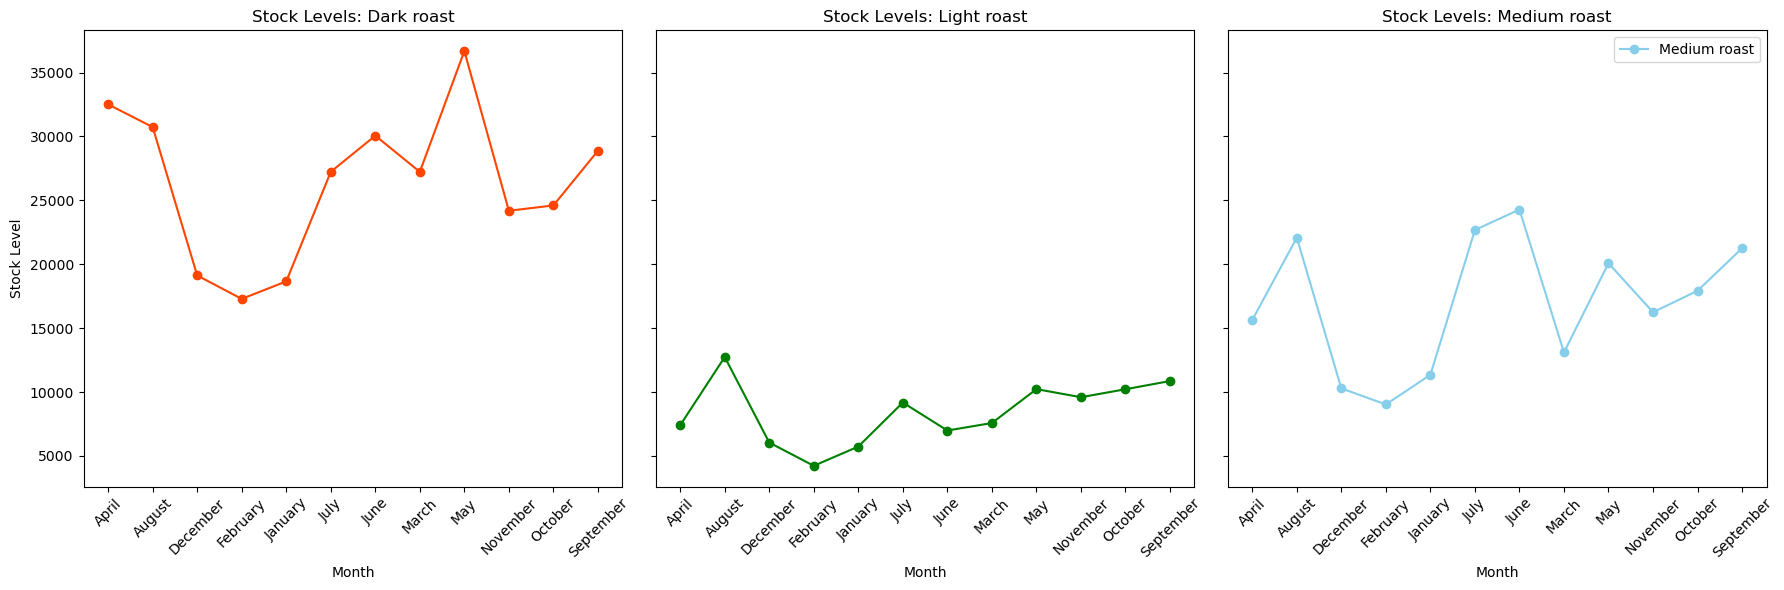

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the specified sheet
source_file = 'Bean there done that data.xlsx'
bean_data = pd.read_excel(source_file, sheet_name='Inventory (finished product)')

# Display the first few rows of the data to understand its structure
print(bean_data.head())

# Ensure the month column is recognized as categorical with the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Check for the 'Month' and 'Stock level' columns
if 'Month' in bean_data.columns and 'Stock level' in bean_data.columns:
    # Group and aggregate stock data by month and product type
    stock_levels = bean_data.groupby(['Month', 'Product'])['Stock level'].sum().reset_index()

    # Ensure that months are in the correct order
    stock_levels['Month'] = pd.Categorical(stock_levels['Month'], categories=month_order, ordered=True)

    # Create a figure with 3 subplots (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Define colors for each product type
    colors = {'Dark roast': 'orangered', 'Medium roast': 'skyblue', 'Light roast': 'green'}

    # Plot lines for each product type in separate subplots
    for ax, product in zip(axes, stock_levels['Product'].unique()):
        product_data = stock_levels[stock_levels['Product'] == product]
        ax.plot(product_data['Month'], product_data['Stock level'], marker='o', color=colors[product], label=product)
        
        # Set labels and title for each subplot
        ax.set_xlabel('Month')
        ax.set_title(f'Stock Levels: {product}')
        ax.tick_params(axis='x', rotation=45)  # Rotate month labels for better readability

    # Set a common y-label for all subplots
    axes[0].set_ylabel('Stock Level')

    # Show the combined plot
    plt.tight_layout()
    plt.legend(loc='upper right')  # Move legend outside the plots for clarity
    plt.show()
else:
    print("The required columns 'Month' and 'Stock level' are not found in the data.")
